# Individual Assignment M4.1: Dahlby Outfitters (Extracted from the textbook)
-------------------------------------------------------------------------
* Daniel Lesh
* djl17006


## Problem statement

Dahlby Outfitters wishes to introduce packaged trail mix as a new product.  The ingredients for the train mix are seeds, raisins, flakes, and two kinds of nuts.  Each ingredient contains certain amounts of vitamins, minerals, protein, and calories.  The marketing department has specified that the product be designed so that a certain minimum nutritional profile is met.  The decision problem is to determine the optimal product composition, that is, to minimize the product cost by choosing the amount for each ingredient in the mix.  The data is given below:

--- | Seeds | Raisins | Flakes | Pecans | Walnuts |Nutritional Req. |
---| --- | --- | --- | ---| ---| ---|
Vitamins |    10             | 20               | 10            |30              | 20               | 20                    |
Minerals   | 5              | 7                | 4               | 9               | 2                | 10                               
Protein    | 1              | 4                | 10              | 2               | 1                | 15                               
Calories   | 500            | 450              | 160             | 300             | 500              | 600                              
| --- | --- | --- | ---| ---| ---|
Cost/Pound | 4              | 5                | 3               | 7               | 6               


For example, the nutritional requirement for Protein is 15. This means that the amount of grams of protein in one package of train mix must be at least 15.  If the trail mix is composed of 1 pounds of raisins and 1 pounds of flakes, and 0 pounds of everything else, the total number of grams of protein will be

$ 4 \cdot 1 + 10 \cdot 1 = 14, $

which will not satisfy the restriction on the number of grams of protein required.  However, if the trail mix is composed of 1 pounds of raisins and 1.5 pound of flakes, and 0 pounds of everything else, the total number of grams of protein will be

$ 4 \cdot 1 + 10 \cdot 1.5 = 19, $

which does satisfy the restriction on the number of grams of protein required.  The cost of this configuration is

$ \$5 \cdot 1 + \$3 \cdot 1.5 = \$9.50. $



1.   Model the problem as an LP and find the number of pounds of each ingredient Dahlby Outfitters should use in order to satisfy the nutritional requirements while minimizing total cost. What is the optimal solution and the optimal value?

**The Optimal solution is 0.48 Seeds, 0.33 Raisins, and 1.32 Flakes (others are zero). Optimal value is \$7.54.**

2.    Suppose that Dahlby want to ensure that at least 0.15 pounds of each ingredient is included in the package.  Add this restriction to the model.  What is the optimal solution and the optimal value now? 

**The Optimal solution is 0.39 Seeds, 0.15 Raisins, 1.36 Flakes, 0.15 Pecans, and 0.15 Walnuts. Optimal value is \$8.33.**

3.    Dahlby would like to know how the optimal value and the optimal solution will change as parameters in the model are modified, using the restriction above that at least 0.15 pounds of each ingredient needs to be included in the mix. You should answer the following questions using the sensitivity report (i.e., without changing parameters and re-optimizing the model). 

You should try to generate the sensitivity report, but I am reproducing mine below so that you can check yours. You can use my report to answer the questions below:


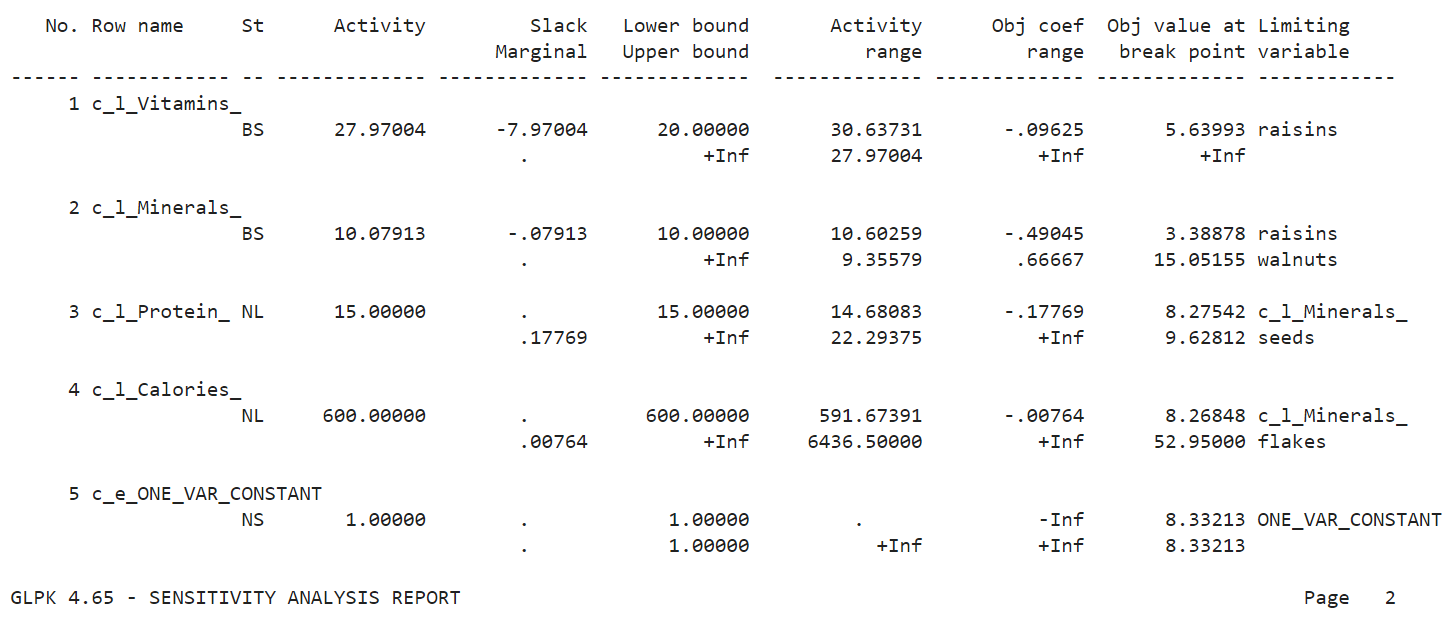

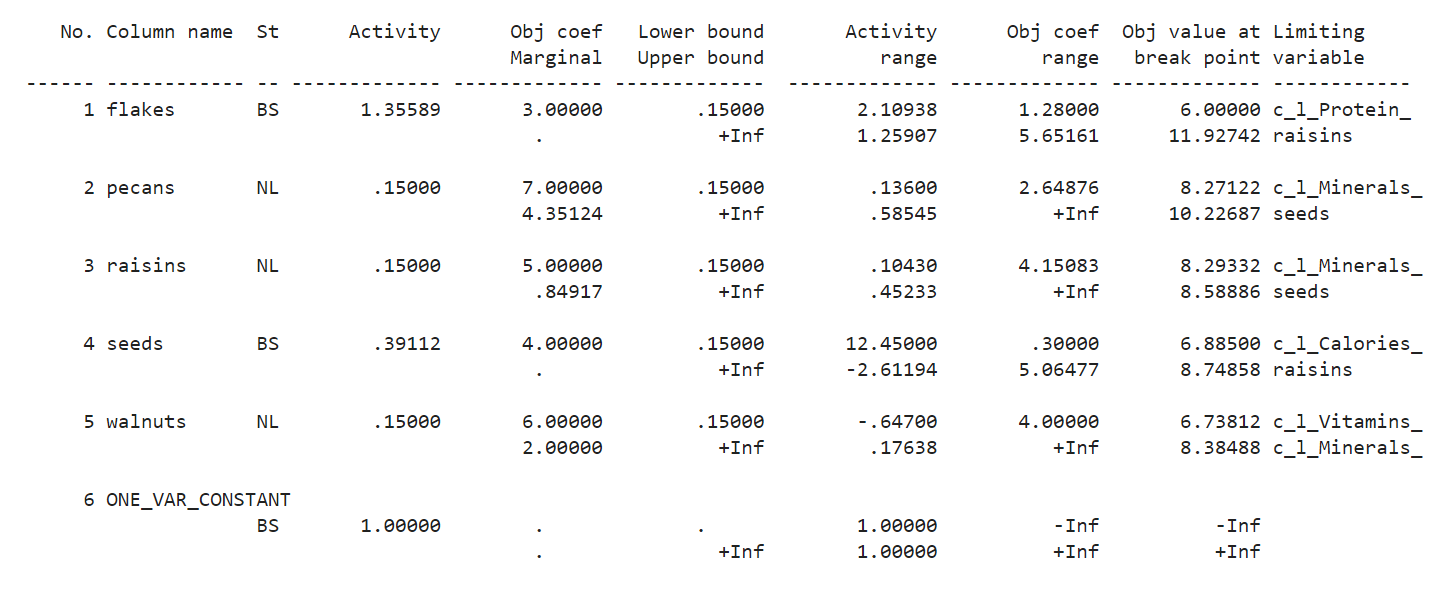



  1.  Suppose that the cost per pound for pecans increases to \$9.  What is the optimal solution now?  What is the optimal value?

  2.  Suppose that the cost per pound for pecans decreases to \$4. What is the optimal solution now?  What is the optimal value?

  3. Suppose that the cost per pound for pecans decreases to \$2. What is the optimal solution now?  What is the optimal value?

  4. Suppose that the cost per pound for flakes  increases to \$7. What is the optimal solution now?  What is the optimal value?

  5. Suppose that the cost per pound for flakes  increases to \$3.50. What is the optimal solution now?  What is the optimal value?

  6. Suppose that the cost per pound for flakes  decreases to \$1.50. What is the optimal solution now?  What is the optimal value?

  7. Suppose that the cost per pound for flakes  decreases to \$1.00. What is the optimal solution now?  What is the optimal value?

  8. Suppose we drop the restriction on the amount of grams of minerals required.   What is the optimal solution now?  What is the optimal value?
 
  9. Suppose we raise the restriction on the amount of grams of minerals required to 11.   What is the optimal solution now?  What is the optimal value?
 
  10. Suppose we raise the restriction on the amount of grams of protein required to 17.   What is the optimal solution now?  What is the optimal value?
 

4. Suppose now that we drop the restriction of 0.15 pounds for each ingredient.  This is because we have found out that what Dahlby is really interested in is that in the final mix, at least 10\% of the mix is devoted to each ingredient.  Create the model now and solve for the optimal value. 

**The optimal solution is 0.22 Seeds, 0.22 Raisins, 1.33 Flakes, 0.22 Pecans, and 0.22 Walnuts; the optimal value is \$8.84.**






## Import Personal Google Drive 

In [16]:
from google.colab import drive # Import personal drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import LP Packages

In [17]:
# Insert program to preform Linear Optimization using the Pyomo Package
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("glpsol") or os.path.isfile("glpsol")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("glpsol") or os.path.isfile("glpsol"))

from pyomo.environ import *

SOLVER = 'glpk'
EXECUTABLE = '/usr/bin/glpsol'

## Problem 1

Before we begin, we must build our Linear Program Model following the table given:

####**Assign Variables in Problems**
* *S* = Seeds 
* *R* = Raisins
* *F* = Flakes 
* *P* = Pecans 
* *W* = Walnuts 

####**Objective Function**

Min Cost = 4*S* + 5*R* + 3*F* + 7*P* + 6*W* `objective function`

####**Constraints**

Subject To: 
* $10S+ 20R + 10F + 30P + 20W \geq 20$   `(Vitamins)`
* $5S+ 7R + 4F + 9P + 2W \geq 10$   `(Minerals)`
* $1S+ 4R + 10F + 2P + 1W \geq 15$   `(Protein)`
* $500S+ 450R + 160F + 300P + 500W \geq 600$   `(Calories)`
* $S,R,F,P,W\in \mathbb{R}^+$ `(Domains)`









> #### **Create a ConcreteModel()**



In [18]:
### Declare the Concrete Model 
  ## This function gives the Pyomo object that we need to build the LP model
    # Using the function below to declare the model 
model = ConcreteModel() 


> #### **Declare Variables**





In [19]:
### Need to tell Pyomo which variables the model has: Variables = S, R, F, P, W, 
  ##  Use function called Var() and assign its return value to an object of the model 
    # Assuming we are using any nonnegative real value (i.e. a positive number) 
model.s = Var(domain=NonNegativeReals)
model.r = Var(domain=NonNegativeReals)
model.f = Var(domain=NonNegativeReals)
model.p = Var(domain=NonNegativeReals)
model.w = Var(domain=NonNegativeReals)
model.ONE_VAR_CONSTANT = Var(domain=NonNegativeReals) # Setting for NonNegative Vars



> #### **Declare Objective Function**

In [20]:
### After declaring variables, declare the objective function using Objective()
  ## 2 parameters consist when using the function Objective() 
    # expr contains the expression equation. This representat the Objective Function 
    # 'sense' indicates whether the problem is minimization or maximization <-- In this problem, we are Minimizing 
model.cost = Objective( 
                      expr = 4*model.s + 5*model.r + 3*model.f + 7*model.p + 6*model.w,
                      sense = minimize
                      )



> #### **Declare Constraints**


In [21]:
### Now, declare the constraints using the function Constraint()
  ## This receives an expression for an inequality or equality as a parameter 
    # This can be represented as: <=, >=, and/or ==
# Vitamins 
model.Vitamins = Constraint(expr = 10*model.s + 20*model.r + 10*model.f + 30*model.p + 20*model.w >= 20)
# Minerals
model.Minerals = Constraint(expr = 5*model.s + 7*model.r + 4*model.f + 9*model.p + 2*model.w >= 10)
# Protein
model.Protein = Constraint(expr = 1*model.s + 4*model.r + 10*model.f + 2*model.p + 1*model.w >= 15)
# Calories 
model.Calories = Constraint(expr = 500*model.s + 450*model.r + 160*model.f + 300*model.p + 500*model.w >= 600)

# Print model created with Constraints 
model.pprint()

6 Var Declarations
    ONE_VAR_CONSTANT : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    f : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    p : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    r : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    s : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    w : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals




> #### **Run Solver**



In [22]:
# Solve Model with Solver Command 
SolverFactory(SOLVER, executable = EXECUTABLE).solve(model).write() 

# Show the results by printing names along with values produced from the model 
print("Minimum Cost = ", model.cost()) # Minimum cost because this is a minimization problem
print("Seeds = ", model.s())
print("Raisins = ", model.r())
print("Flakes = ", model.f())
print("Pecans = ", model.p())
print("Walnuts = ", model.w())
  # Solution below verifies and matches answers given in problem instructions

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 7.53579952267303
  Upper bound: 7.53579952267303
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 6
  Number of nonzeros: 21
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0140228271484375
# ----------------------------------------------------------
#   Solution Information
# ---------------



> #### **Problem 1: Solver Results**
* Minimum Cost = $7.54 
* Seeds = 0.48 
* Raisins = 0.33
* Flakes = 1.32
* Pecans = 0.0 
* Walnuts = 0.0 




## Problem 2

Include 0.15 lb Ingredients constraint in the new LP model:

####**Objective Function**

Min Cost = 4*S* + 5*R* + 3*F* + 7*P* + 6*W* `objective function`

####**Constraints**

Subject To: 
* $10S+ 20R + 10F + 30P + 20W \geq 20$   `(Vitamins)`
* $5S+ 7R + 4F + 9P + 2W \geq 10$   `(Minerals)`
* $1S+ 4R + 10F + 2P + 1W \geq 15$   `(Protein)`
* $500S+ 450R + 160F + 300P + 500W \geq 600$   `(Calories)`
* $S, R, F, P, W \geq 0.15$   `(Ingredients)`

* $S,R,F,P,W\in \mathbb{R}^+$ `(Domains)`











> #### **Reestablish LP Model Previously Built in Problem 1**



In [23]:
### Declare the Concrete Model 
  ## This function gives the Pyomo object that we need to build the LP model
    # Using the function below to declare the model 
model = ConcreteModel() 

### Need to tell Pyomo which variables the model has: Variables = S, R, F, P, W, 
  ##  Use function called Var() and assign its return value to an object of the model 
    # Assuming we are using any nonnegative real value (i.e. a positive number) 
model.s = Var(domain=NonNegativeReals)
model.r = Var(domain=NonNegativeReals)
model.f = Var(domain=NonNegativeReals)
model.p = Var(domain=NonNegativeReals)
model.w = Var(domain=NonNegativeReals)
model.ONE_VAR_CONSTANT = Var(domain=NonNegativeReals) # Setting for NonNegative Vars

### After declaring variables, declare the objective function using Objective()
  ## 2 parameters consist when using the function Objective() 
    # expr contains the expression equation. This represents the Objective Function 
    # 'sense' indicates whether the problem is minimization or maximization <-- In this problem, we are Minimizing 
model.cost = Objective( 
                      expr = 4*model.s + 5*model.r + 3*model.f + 7*model.p + 6*model.w,
                      sense = minimize
                      )

### Declare the constraints using the function Constraint()
  ## This receives an expression for an inequality or equality as a parameter 
    # This can be represented as: <=, >=, and/or ==
# Vitamins 
model.Vitamins = Constraint(expr = 10*model.s + 20*model.r + 10*model.f + 30*model.p + 20*model.w >= 20)
# Minerals
model.Minerals = Constraint(expr = 5*model.s + 7*model.r + 4*model.f + 9*model.p + 2*model.w >= 10)
# Protein
model.Protein = Constraint(expr = 1*model.s + 4*model.r + 10*model.f + 2*model.p + 1*model.w >= 15)
# Calories 
model.Calories = Constraint(expr = 500*model.s + 450*model.r + 160*model.f + 300*model.p + 500*model.w >= 600)



> #### **Include New Constraints**



In [ ]:
# Include new constraint in model
model.SeedsLBConstraint = Constraint(expr = model.s >= 0.15)
model.RaisinsLBConstraint = Constraint(expr = model.r >= 0.15)
model.FlakesLBConstraint = Constraint(expr = model.f >= 0.15)
model.PecansLBConstraint = Constraint(expr = model.p >= 0.15)
model.WalnutsLBConstraint = Constraint(expr = model.w >= 0.15)

# Print model created with Constraints 
model.pprint()

6 Var Declarations
    ONE_VAR_CONSTANT : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    f : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    p : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    r : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    s : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    w : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals




> #### **Run Solver**



In [24]:
# Solve Model with Solver Command 
SolverFactory(SOLVER, executable = EXECUTABLE).solve(model).write() 

## Show the results by printing names along with values produced from the model 
print("Minimum Cost = ", model.cost()) # Minimum cost because this is a minimization problem
print("Seeds = ", model.s()) 
print("Raisins = ", model.r())
print("Flakes = ", model.f())
print("Pecans = ", model.p())
print("Walnuts = ", model.w())
  # Solution below verifies and matches answers given in problem instructions

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 7.53579952267303
  Upper bound: 7.53579952267303
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 6
  Number of nonzeros: 21
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.014178991317749023
# ----------------------------------------------------------
#   Solution Information
# -------------



> #### **Problem 2: Solver Results**
* Minimum Cost = $8.33
* Seeds = 0.39 
* Raisins = 0.15 
* Flakes = 1.36
* Pecans = 0.15
* Walnuts = 0.15



## Problem 3: Sensitivity Analysis


> #### Build Sensitivity Analysis for Problem 3 (1-10)




In [25]:
# Save the LP Model that was built
model.write("/content/model.lp", io_options={'symbolic_solver_labels': True}) # model.lp file will run after executing line of code 

# Generate the file "sensit.sen", which contains the report 
!/usr/bin/glpsol -m /content/model.lp --lp --ranges sensit.sen # Will use "sensit.sen" to run report built for sensitivity analysis 

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /content/model.lp --lp --ranges sensit.sen
Reading problem data from '/content/model.lp'...
5 rows, 6 columns, 21 non-zeros
54 lines were read
GLPK Simplex Optimizer, v4.65
5 rows, 6 columns, 21 non-zeros
Preprocessing...
4 rows, 5 columns, 20 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+02  ratio =  5.000e+02
GM: min|aij| =  4.229e-01  max|aij| =  2.364e+00  ratio =  5.590e+00
EQ: min|aij| =  1.789e-01  max|aij| =  1.000e+00  ratio =  5.590e+00
Constructing initial basis...
Size of triangular part is 4
      0: obj =   0.000000000e+00 inf =   4.938e+00 (4)
      5: obj =   8.044041451e+00 inf =   0.000e+00 (0)
*     6: obj =   7.535799523e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (40436 bytes)
Write sensitivity analysis report to 'sensit.sen'...


In [26]:
## Running code below to see the contents of the sensitivity analysis report
!cat /content/sensit.sen
  
## Sensitivity analysis below verifies and matches sensitivity analysis given in problem instructions 
  # Included in sensitivity analysisis are the constraints for .15lbs of each ingredient established above as problem called for! 

GLPK 4.65 - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  cost = 7.535799523 (MINimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 c_l_Vitamins_
                    BS      24.64200      -4.64200      20.00000       29.92228       -.09625       5.16393 c_l_Minerals_
                                            .               +Inf       23.33333        .10000      10.00000 c_l_Protein_

     2 c_l_Minerals_
                    NL      10.00000        .           10.00000        9.42149       -.49045       7.25207 r
                                            .49045          +Inf       1

## Problem 3: 1 - 10 

Before beginning, it is important to identify the formulas that are available to find adjustments in the sensitivity analysis report without reoptimizing the LP model that has been built: 

> **Questions 1 - 7 rely on the formula below:**

$New Objective = Original Objective + (c_2 - c_1)\cdot VariableValue$

1. $8.33 + (9 - 7) \cdot 0.15000 = 8.63$
2. $8.33 + (4 - 7) \cdot 0.15000 = 7.88$
3. $8.33 + (2 - 7) \cdot 0.15000 = 7.58$ --> *Outside of Allowable Interval for Pecans Coefficient*
4. $8.33 + (7 - 3) \cdot 1.35589 = 13.75$ --> *Outside of Allowable Interval for Flakes Coefficient*
5. $8.33 + (3.50 - 3) \cdot 1.35589 = 9.01$
6. $8.33 + (1.50 - 3) \cdot 1.35589 = 6.31$
7. $8.33 + (1 - 3) \cdot 1.35589 = 5.62$ --> *Outside of Allowable Interval for Flakes Coefficient*

> **Questions 8 - 10 rely on the formula below:**

$New Objetive = Original Objective + (r_𝟐−r_𝟏) \cdot ShadowPrice$

8. $8.33 + (0 - 10.07913) \cdot - .49045 = 13.27$
9. $8.33 + (11 - 10.07913) \cdot - .49045 = 7.88$ 
10. $8.33 + (17 - 15) \cdot - .00764 = 8.31$





## Problem 4

Include 10% of Ingredients in Final Mix for the Constraints in the new LP model: 
####**Objective Function**

Min Cost = 4*S* + 5*R* + 3*F* + 7*P* + 6*W* `objective function`

####**Constraints**

Subject To: 
* $10S+ 20R + 10F + 30P + 20W \geq 20$   `(Vitamins)`
* $5S+ 7R + 4F + 9P + 2W \geq 10$   `(Minerals)`
* $1S+ 4R + 10F + 2P + 1W \geq 15$   `(Protein)`
* $500S+ 450R + 160F + 300P + 500W \geq 600$   `(Calories)`
* $S\geq 0.10(S + R + F + P + W)$   `(Seeds)`
* $R\geq 0.10(S + R + F + P + W)$   `(Raisins)`
* $F\geq 0.10(S + R + F + P + W)$   `(Flakes)`
* $P\geq 0.10(S + R + F + P + W)$   `(Pecans)`
* $W\geq 0.10(S + R + F + P + W)$   `(Walnuts)`

* $S,R,F,P,W\in \mathbb{R}^+$ `(Domains)`











> #### **Reestablish LP Model Previously Built in Problem 1**



In [27]:
### Declare the Concrete Model 
  ## This function gives the Pyomo object that we need to build the LP model
    # Using the function below to declare the model 
model = ConcreteModel() 

### Need to tell Pyomo which variables the model has: Variables = S, R, F, P, W, 
  ##  Use function called Var() and assign its return value to an object of the model 
    # Assuming we are using any nonnegative real value (i.e. a positive number) 
model.s = Var(domain=NonNegativeReals)
model.r = Var(domain=NonNegativeReals)
model.f = Var(domain=NonNegativeReals)
model.p = Var(domain=NonNegativeReals)
model.w = Var(domain=NonNegativeReals)
model.ONE_VAR_CONSTANT = Var(domain=NonNegativeReals) # Setting for NonNegative Vars

### After declaring variables, declare the objective function using Objective()
  ## 2 parameters consist when using the function Objective() 
    # expr contains the expression equation. This represents the Objective Function 
    # 'sense' indicates whether the problem is minimization or maximization <-- In this problem, we are Minimizing 
model.cost = Objective( 
                      expr = 4*model.s + 5*model.r + 3*model.f + 7*model.p + 6*model.w,
                      sense = minimize
                      )

### Declare the constraints using the function Constraint()
  ## This receives an expression for an inequality or equality as a parameter 
    # This can be represented as: <=, >=, and/or ==
# Vitamins 
model.Vitamins = Constraint(expr = 10*model.s + 20*model.r + 10*model.f + 30*model.p + 20*model.w >= 20)
# Minerals
model.Minerals = Constraint(expr = 5*model.s + 7*model.r + 4*model.f + 9*model.p + 2*model.w >= 10)
# Protein
model.Protein = Constraint(expr = 1*model.s + 4*model.r + 10*model.f + 2*model.p + 1*model.w >= 15)
# Calories 
model.Calories = Constraint(expr = 500*model.s + 450*model.r + 160*model.f + 300*model.p + 500*model.w >= 600)



> #### **Include New Constraints**




In [28]:
### Construct an additional 5 constraints in the problem that constitute the final mix of ingredients greater than or equal to 10%
  ## Individually set each model >= multiplying each model by .1 * sum of Model S, R, F, P, W
    # This gives us the final mix and makes sure 10% is devoted to each ingredient 
model.Seeds_FinalMix = Constraint(expr = model.s >= .1*(model.s + model.r + model.f + model.p + model.w))
model.Raisins_FinalMix = Constraint(expr = model.r >= .1*(model.s + model.r + model.f + model.p + model.w))
model.Flakes_FinalMix = Constraint(expr = model.f >= .1*(model.s + model.r + model.f + model.p + model.w))
model.Pecans_FinalMix = Constraint(expr = model.p >= .1*(model.s + model.r + model.f + model.p + model.w))
model.Walnuts_FinalMix = Constraint(expr = model.w >= .1*(model.s + model.r + model.f + model.p + model.w))

# Print model created with Constraints 
model.pprint()

6 Var Declarations
    ONE_VAR_CONSTANT : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    f : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    p : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    r : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    s : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    w : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals




> #### **Run Solver**



In [29]:
# Solve Model with Solver Command 
SolverFactory(SOLVER, executable = EXECUTABLE).solve(model).write() 

# Show the results by printing names along with values produced from the model 
print("Minimum Cost = ", model.cost()) # Minimum cost because this is a minimization problem
print("Seeds = ", model.s())
print("Raisins = ", model.r())
print("Flakes = ", model.f())
print("Pecans = ", model.p())
print("Walnuts = ", model.w())
  # Solution below verifies and matches answers given in problem instructions

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 8.84340138918123
  Upper bound: 8.84340138918123
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 6
  Number of nonzeros: 46
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.013481616973876953
# ----------------------------------------------------------
#   Solution Information
# ------------



> #### **Problem 4: Solver Results**
* Minimum Cost = $8.84
* Seeds = 0.22
* Raisins = 0.22 
* Flakes = 1.3228
* Pecans = 0.22
* Walnuts = 0.22



**Directions:** 
You may work with your fellow classmates, but you need to complete the assignment on your own. I expect different headers and COMMENTS (comments are the key to showing that you really know your stuff - without comments, your code is useless to me).

**Rubric:**
* Code questions (50%):
  * 10% question 1, 20% question 2, 20% question 4
  * Full credit (100): Correct formulation and lots of useful comments. Nice headers and text cells included in the notebook.
  * Half credit (50): Solution is wrong (bad code) or the comments are mediocre or directly copied. Nice headers and text cells included in the notebook.
  * No credit (0): Bad code and bad comments, or good code and no comments. Poorly laid out notebook.
* Sensitivity report questions (50%)
  * Full credit (5%) Explicitly mentions whether optimal solution changes or not, and explicitly mentions the new optimal value; if not possible to infer information from report, explicitly mentions so.
  * Half credit (3%) Gives one correct answer (optimal value or optimal solution) and forgets or gives incorrect answer for the other element
  * Both answers are incorrect (or not given)
